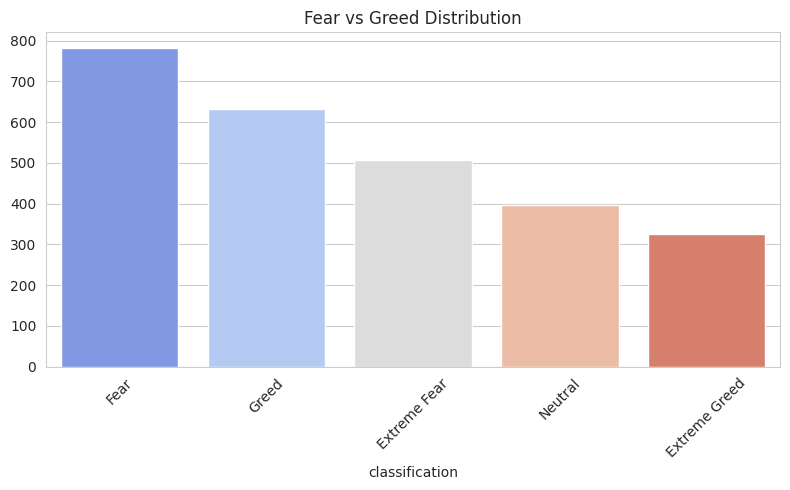

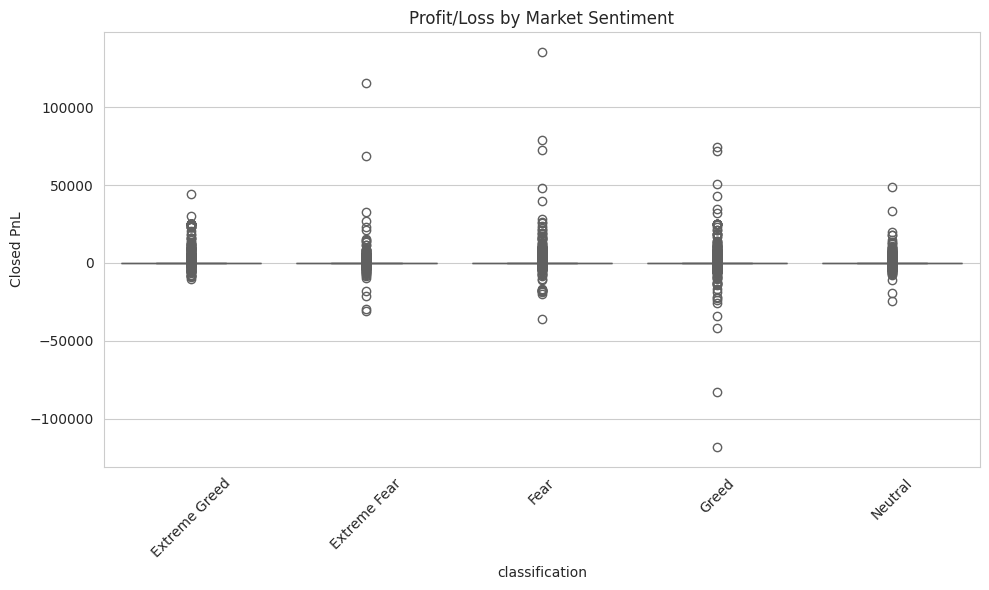

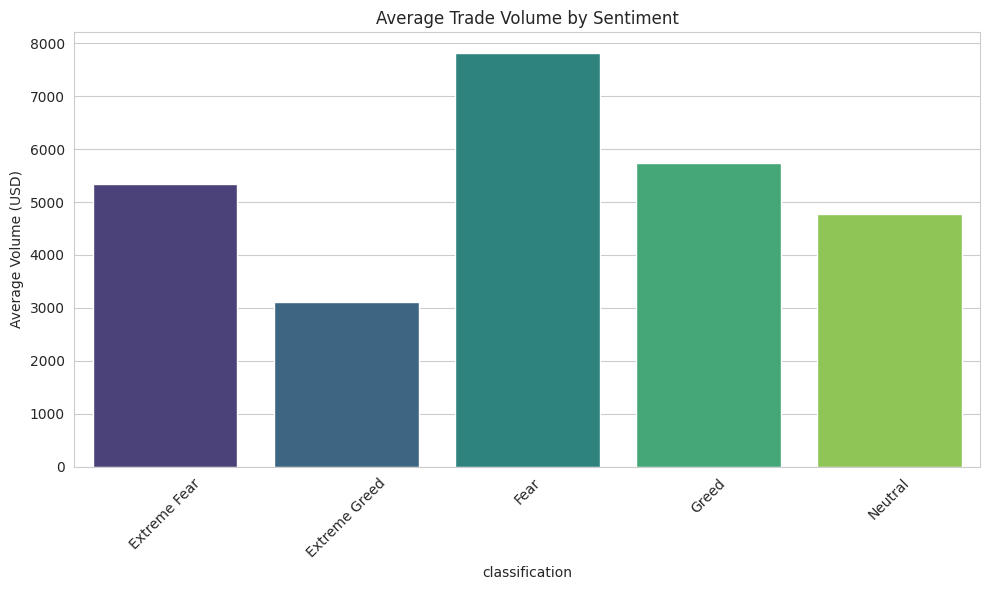

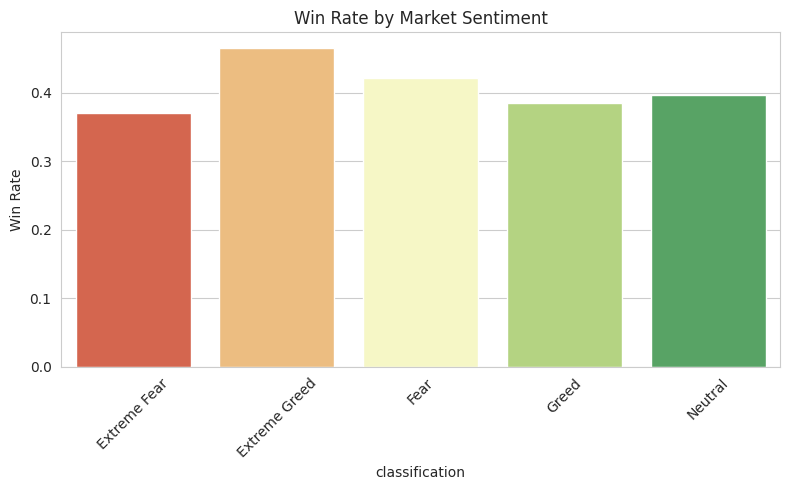

KEY INSIGHTS
1. Most Profitable Period: Extreme Greed ($67.89)
2. Least Profitable Period: Neutral ($34.31)
3. Statistical Significance: p-value = 0.0000

TRADING RECOMMENDATIONS:
• Reduce position sizes during periods of extreme market sentiment (both Fear & Greed)
• Consider contrarian trades during high fear periods (buy when others are fearful)
• Apply stricter risk management during volatile sentiment phases
• Continuously monitor sentiment shifts for early indicators of market reversals


In [6]:
# Data Science Assignment - Web3 Trading
# Candidate: Pranjal Mankar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load datasets
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trader_df = pd.read_csv("/content/historical_data.csv")

# Data cleaning
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['date'] = trader_df['Timestamp IST'].dt.date

# Convert numeric columns
trader_df['Closed PnL'] = pd.to_numeric(trader_df['Closed PnL'], errors='coerce')
trader_df['Size USD'] = pd.to_numeric(trader_df['Size USD'], errors='coerce')
trader_df['Size Tokens'] = pd.to_numeric(trader_df['Size Tokens'], errors='coerce')

# Create directories
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)

# Merge datasets
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on="date", how="inner")

# 1. Sentiment Distribution
plt.figure(figsize=(8, 5))
sentiment_counts = sentiment_df['classification'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Fear vs Greed Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/sentiment_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. PnL by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x="classification", y="Closed PnL", data=merged_df, palette="coolwarm")
plt.title("Profit/Loss by Market Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/pnl_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

# 3. Trading Volume by Sentiment
plt.figure(figsize=(10, 6))
volume_by_sentiment = merged_df.groupby('classification')['Size USD'].mean()
sns.barplot(x=volume_by_sentiment.index, y=volume_by_sentiment.values, palette="viridis")
plt.title("Average Trade Volume by Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Average Volume (USD)")
plt.tight_layout()
plt.savefig("outputs/volume_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. Win Rate Analysis
merged_df['is_profitable'] = merged_df['Closed PnL'] > 0
win_rates = merged_df.groupby('classification')['is_profitable'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=win_rates.index, y=win_rates.values, palette="RdYlGn")
plt.title("Win Rate by Market Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Win Rate")
plt.tight_layout()
plt.savefig("outputs/win_rate_by_sentiment.png", dpi=300, bbox_inches='tight')
plt.show()

# Performance Summary
performance_summary = merged_df.groupby('classification').agg({
    'Closed PnL': ['mean', 'count'],
    'Size USD': ['mean']
}).round(2)

# Statistical Test
sentiment_groups = [group['Closed PnL'].dropna() for name, group in merged_df.groupby('classification')]
stat, p_value = stats.kruskal(*sentiment_groups)

# Save results
merged_df.to_csv("csv_files/merged_dataset.csv", index=False)
performance_summary.to_csv("csv_files/performance_summary.csv")

# Key Insights
print("KEY INSIGHTS")


pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean()
best_sentiment = pnl_by_sentiment.idxmax()
worst_sentiment = pnl_by_sentiment.idxmin()

print(f"1. Most Profitable Period: {best_sentiment} (${pnl_by_sentiment[best_sentiment]:.2f})")
print(f"2. Least Profitable Period: {worst_sentiment} (${pnl_by_sentiment[worst_sentiment]:.2f})")
print(f"3. Statistical Significance: p-value = {p_value:.4f}")

# Trading Recommendations
print("\nTRADING RECOMMENDATIONS:")
print("• Reduce position sizes during periods of extreme market sentiment (both Fear & Greed)")
print("• Consider contrarian trades during high fear periods (buy when others are fearful)")
print("• Apply stricter risk management during volatile sentiment phases")
print("• Continuously monitor sentiment shifts for early indicators of market reversals")